<a href="https://colab.research.google.com/github/nestormontano/PrDS_2024__PredictingChurnForBankCustomers/blob/main/Debe2_Grupo5_Random_y_GAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TAREA 2**
**RANDOM FOREST**

# **GRUPO 5 PYTHON - BANK**
KLEBER GABOR Y JAVIER HERNANDEZ

RANDOM FOREST UTILIZANDO LIME

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#!pip install skimpy

In [1]:
#import skimpy # Descriptivas masivas

In [71]:
data= pd.read_csv('Churn_Modelling.csv')

In [72]:
data.head(5)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [73]:
#identificamos datos nulos.
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [74]:
# conocer las dimensiones
data.shape

(10000, 14)

In [75]:
#extraemos datos
X = data.iloc[:,3:13]  # dejamos fuera rowNumber, CustomerId, Surname, variables no útiles para el análisis
y = data.iloc[:,-1] # recupera solo filas, sin cabecera.

In [76]:
X.shape

(10000, 10)

In [77]:
y.shape

(10000,)

In [78]:
X.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10

In [79]:
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)
#exited = pd.get_dummies(X["Exited"],drop_first=True)

In [80]:
geography.shape

(10000, 2)

In [81]:
# unimos las datos arriba seleccionados
X = pd.concat([X,geography,gender],axis=1)

# borramos las columnas no necesarias
X = X.drop(['Geography','Gender'],axis=1)

In [82]:
X.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Germany  Spain   Male  
0               1        101348.88    False  False  False  
1               1        112542.58    False   True  False  
2               0        113931.57    False  False  False  
3               0         93826.63    False  False  False  
4               1         79084.10    False   True  False

In [83]:
X.shape

(10000, 11)

In [84]:
#entrenar el modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=0)

In [85]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
import pickle
pickle.dump(classifier, open("classifier.pkl", "wb"))

In [87]:
!pip install lime

In [88]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data = np.array(X_train),
    feature_names = X_train.columns,
    mode = "classification"
)

In [89]:
X_test.iloc[4]

CreditScore              706
Age                       38
Tenure                     5
Balance            163034.82
NumOfProducts              2
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    135662.17
Germany                 True
Spain                  False
Male                    True
Name: 2343, dtype: object

In [90]:
exp = interpretor.explain_instance(
    data_row = X_test.iloc[4],    # new data
    predict_fn = classifier.predict_proba
)

exp.show_in_notebook(show_table = True)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [91]:
exp = interpretor.explain_instance(
    data_row = X_test.iloc[5],    # new data
    predict_fn = classifier.predict_proba
)

exp.show_in_notebook(show_table = True)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

### RANDOM FOREST BASADO EN EJERCICIO DADO EN CLASE

In [92]:
import os # Funciones relacionadas con el sistema operativo
import math # Operaciones matemáticas avanzadas
import numpy as np # Operaciones vectoriales (np.array) eficientes
import pandas as pd # Manejo de datos tabulares (dataframe) y descriptiva
import scipy # Herramientas y algoritmos matemáticos
import matplotlib.pyplot as plt # Visualizaciones
import seaborn as sns # Visualizaciones mas sencillas
import skimpy # Descriptivas masivas


In [93]:
## Para el ajuste del modelo
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
## Para el preprocesamiento
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
## Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Modelo
from sklearn.ensemble import RandomForestClassifier

In [94]:
data= pd.read_csv('Churn_Modelling.csv')

In [ ]:
data.info()


In [102]:
SubData = data.iloc[:,3:14]

In [103]:
skimpy.skim(SubData)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ int64       │ 7     │                                                          │
│ │ Number of columns │ 11     │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0   ┃ p25    ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ CreditScore        │   0 │     0 │     650 │     97 │  350 │    580 │     650 │     720 │     850 │  ▂▅▇▆▃ │  │
│ │ Age                │   0 │     0 │      39 │     10 │   18 │     32 │      37 │      44 │      92 │  ▃▇▃▁  │  │
│ │ Tenure             │   0 │     0 │       5 │    2.9 │    0 │      3 │       5 │       7 │      10 │ ▆▇▃▇▇▆ │  │
│ │ Balance            │   0 │     0 │   76000 │  62000 │    0 │      0 │   97000 │  130000 │  250000 │ ▇▂▆▅▁  │  │
│ │ NumOfProducts      │   0 │     0 │     1.5 │   0.58 │    1 │      1 │       1 │       2 │       4 │  ▇ ▇   │  │
│ │ HasCrCard          │   0 │     0 │    0.71 │   0.46 │    0 │      0 │       1 │       1 │       1 │ ▃    ▇ │  │
│ │ IsActiveMember     │   0 │     0 │    0.52 │    0.5 │    0 │      0 │       1 │       1 │       1 │ ▇    ▇ │  │
│ │ EstimatedSalary    │   0 │     0 │  100000 │  58000 │   12 │  51000 │  100000 │  150000 │  200000 │ ▇▇▇▇▇▇ │  │
│ │ Exited             │   0 │     0 │     0.2 │    0.4 │    0 │      0 │       0 │       0 │       1 │ ▇    ▂ │  │
│ └────────────────────┴─────┴───────┴─────────┴────────┴──────┴────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Geography                 │       0 │          0 │                            1 │                    10000 │  │
│ │ Gender                    │       0 │          0 │                            1 │                    10000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [104]:
SubData['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

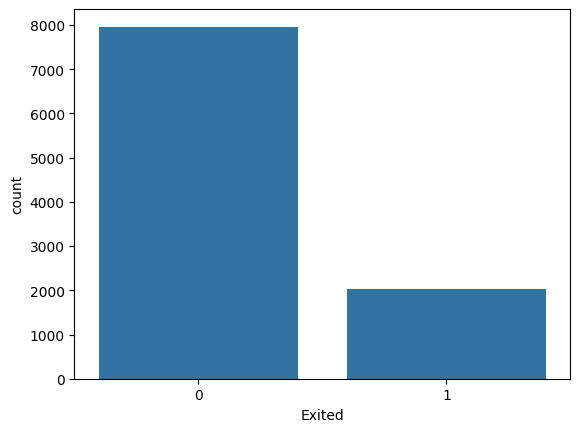

In [105]:
sns.countplot(data= SubData, x="Exited")
plt.show()

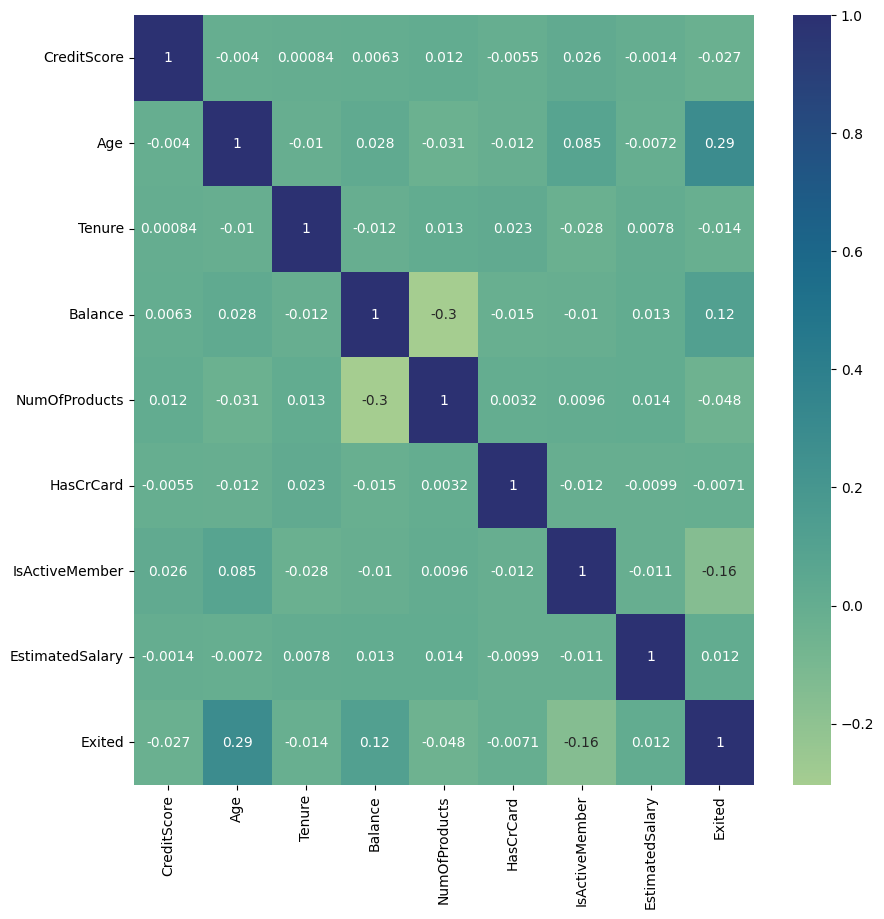

In [106]:
plt.figure(figsize=(10,10))
sns.heatmap( SubData.select_dtypes(exclude='object').corr(),
annot=True, cmap="crest")
plt.show()

In [169]:
# unimos las datos arriba seleccionados
#X1 = pd.concat([SubData,geography,gender],axis=1)

# borramos las columnas no necesarias
#X1 = X1.drop(['Geography','Gender'],axis=1)

In [170]:
X_train, X_test, y_train, y_test= train_test_split(
SubData.drop('Exited', axis = 'columns'), ## Variables X
SubData['Exited'], ## Variable y
test_size=0.2, ## Tamaño para el test
random_state=123, ## Semilla para aleatorios
stratify= SubData['Exited'] ## Variable para estratificar
)


In [171]:
X_train.shape


(8000, 10)

In [172]:
X_test.shape


(2000, 10)

In [173]:
y_train.shape

(8000,)

In [174]:
y_test.shape


(2000,)

In [175]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [176]:
categorical_columns = ['Geography', 'Gender']


In [177]:
numerical_columns = [ 'CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']


In [178]:
prep = ColumnTransformer([
('encoder', OneHotEncoder(), categorical_columns),
('scaler', StandardScaler(),numerical_columns)
], remainder= 'drop') ## 'drop' -> se elimina el resto de columnas
prep


ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                 ['Geography', 'Gender']),
                                ('scaler', StandardScaler(),
                                 ['Balance', 'CreditScore', 'Age', 'Tenure',
                                  'Balance', 'NumOfProducts',
                                  'EstimatedSalary'])])

In [179]:
ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
['Geography', 'Gender']),
('scaler', StandardScaler(),
['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary'])])


ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                 ['Geography', 'Gender']),
                                ('scaler', StandardScaler(),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary'])])

In [180]:
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=123)

In [181]:
metricas = ['accuracy', 'balanced_accuracy', 'precision', 'recall']


In [182]:
rf_pipe = Pipeline([('preproc', prep),
('rf', RandomForestClassifier(
criterion= 'gini',
class_weight= 'balanced', ## Balanceo
random_state=123) )
])

In [183]:
rf_pipe.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'preproc', 'rf', 'preproc__n_jobs', 'preproc__remainder', 'preproc__sparse_threshold', 'preproc__transformer_weights', 'preproc__transformers', 'preproc__verbose', 'preproc__verbose_feature_names_out', 'preproc__encoder', 'preproc__scaler', 'preproc__encoder__categories', 'preproc__encoder__drop', 'preproc__encoder__dtype', 'preproc__encoder__handle_unknown', 'preproc__encoder__max_categories', 'preproc__encoder__min_frequency', 'preproc__encoder__sparse', 'preproc__encoder__sparse_output', 'preproc__scaler__copy', 'preproc__scaler__with_mean', 'preproc__scaler__with_std', 'rf__bootstrap', 'rf__ccp_alpha', 'rf__class_weight', 'rf__criterion', 'rf__max_depth', 'rf__max_features', 'rf__max_leaf_nodes', 'rf__max_samples', 'rf__min_impurity_decrease', 'rf__min_samples_leaf', 'rf__min_samples_split', 'rf__min_weight_fraction_leaf', 'rf__n_estimators', 'rf__n_jobs', 'rf__oob_score', 'rf__random_state', 'rf__verbose', 'rf__warm_start'])

In [184]:
X_train.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
9385          687   Germany    Male   44       8   95368.14              2   
2155          660    France  Female   35       6  100768.77              1   
768           684     Spain    Male   41       2  119782.72              2   
6082          725   Germany    Male   40       8  104149.66              1   
2926          510    France    Male   63       8       0.00              2   

      HasCrCard  IsActiveMember  EstimatedSalary  
9385          1               1          1787.85  
2155          1               0         19199.61  
768           0               0        120284.67  
6082          1               0         62027.90  
2926          1               1        115291.86

In [185]:
prep.fit_transform(X_train).shape


(8000, 12)

CREAMOS MALLA

In [186]:
rf_grid = dict(
## Complejidad dle costo
rf__ccp_alpha= [0.01, 0.001],
## Min de observaciones para ser cortado
rf__min_samples_split=[70, 110],
## Numero de arboles, es recomendable es usar 100~500/1000
rf__n_estimators= [200, 400, 700],
## Maximo de variables
rf__max_features= [5, 6] # En Python sí hacemos OHE
)

Entrenamiento de Malla de Busqueda en la Crossvalidation

In [187]:
rf_tuned = GridSearchCV(rf_pipe, rf_grid, scoring= metricas,
refit= 'balanced_accuracy', cv=cv) #, n_jobs=-1)


In [188]:
rf_tuned.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=123),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['Geography',
                                                                          'Gender']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Balance',
                                                                          'CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                                          'Balance',
                                                                          'NumOfProducts',
                                                                          'EstimatedSalary'])])),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=123))]),
             param_grid={'rf__ccp_alpha': [0.01, 0.001],
                         'rf__max_features': [5, 6],
                         'rf__min_samples_split': [70, 110],
                         'rf__n_estimators': [200, 400, 700]},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'precision', 'recall'])

In [189]:
GridSearchCV (cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=123),
estimator=Pipeline(steps=[('preproc',
ColumnTransformer(transformers=[('encoder',
OneHotEncoder(),
['Geography',
'Gender']),
('scaler',
StandardScaler(),
['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary'])])),
('rf',
RandomForestClassifier(class_weight='balanced',
random_state=123))]),
              param_grid={'rf__ccp_alpha': [0.01, 0.001],
                          'rf__max_features': [5, 6],
'rf__min_samples_split': [70, 110],
'rf__n_estimators': [200, 400, 700]},
refit='balanced_accuracy',
scoring=['accuracy', 'balanced_accuracy', 'precision', 'recall'])

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=123),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['Geography',
                                                                          'Gender']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                                          'Balance',
                                                                          'NumOfProducts',
                                                                          'EstimatedSalary'])])),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=123))]),
             param_grid={'rf__ccp_alpha': [0.01, 0.001],
                         'rf__max_features': [5, 6],
                         'rf__min_samples_split': [70, 110],
                         'rf__n_estimators': [200, 400, 700]},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'precision', 'recall'])

In [ ]:
res_cv= pd.DataFrame(rf_tuned.cv_results_)
res_cv.columns


In [191]:
cols= res_cv.columns[ res_cv.columns.str.startswith('param_rf')].to_list() + res_cv.columns[
res_cv.columns.str.startswith('mean_test') ].to_list()
res_cv_means= res_cv.loc[:, cols ].sort_values(by='mean_test_accuracy', ascending=False)
res_cv_means

param_rf__ccp_alpha param_rf__max_features param_rf__min_samples_split  \
20               0.001                      6                          70   
19               0.001                      6                          70   
18               0.001                      6                          70   
12               0.001                      5                          70   
14               0.001                      5                          70   
13               0.001                      5                          70   
16               0.001                      5                         110   
17               0.001                      5                         110   
15               0.001                      5                         110   
22               0.001                      6                         110   
23               0.001                      6                         110   
21               0.001                      6                         110   
6                 0.01                      6                          70   
7                 0.01                      6                          70   
9                 0.01                      6                         110   
3                 0.01                      5                         110   
0                 0.01                      5                          70   
10                0.01                      6                         110   
8                 0.01                      6                          70   
11                0.01                      6                         110   
4                 0.01                      5                         110   
1                 0.01                      5                          70   
2                 0.01                      5                          70   
5                 0.01                      5                         110   

   param_rf__n_estimators  mean_test_accuracy  mean_test_balanced_accuracy  \
20                    700            0.792687                     0.775778   
19                    400            0.792625                     0.775625   
18                    200            0.792312                     0.775200   
12                    200            0.792250                     0.777215   
14                    700            0.791937                     0.775764   
13                    400            0.791625                     0.775910   
16                    400            0.787187                     0.777118   
17                    700            0.786937                     0.776504   
15                    200            0.786875                     0.776693   
22                    400            0.786750                     0.777642   
23                    700            0.786750                     0.776957   
21                    200            0.786500                     0.776572   
6                     200            0.775438                     0.744631   
7                     400            0.773562                     0.742541   
9                     200            0.772875                     0.742566   
3                     200            0.771437                     0.742234   
0                     200            0.765500                     0.741473   
10                    400            0.764875                     0.737200   
8                     700            0.764500                     0.737992   
11                    700            0.762188                     0.737681   
4                     400            0.760500                     0.735822   
1                     400            0.759563                     0.736717   
2                     700            0.755812                     0.734248   
5                     700            0.752250                     0.732696   

    mean_test_precision  mean_test_recall  
20             0.494452          0.747239  
19             0.494422          0.746

In [192]:
rf_tuned.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Geography', 'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['Balance', 'CreditScore',
                                                   'Age', 'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('rf',
                 RandomForestClassifier(ccp_alpha=0.001,
                                        class_weight='balanced', max_features=6,
                                        min_samples_split=110, n_estimators=400,
                                        random_state=123))])

In [210]:
Pipeline(steps=[('preproc',
ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                 ['Geography',
'Gender']),
('scaler', StandardScaler(),
['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary'])])),
('rf',
RandomForestClassifier(ccp_alpha=0.001,
class_weight='balanced', max_features=6,
min_samples_split=70, n_estimators=700,
random_state=123))])

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Geography', 'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('rf',
                 RandomForestClassifier(ccp_alpha=0.001,
                                        class_weight='balanced', max_features=6,
                                        min_samples_split=70, n_estimators=700,
                                        random_state=123))])

In [211]:
print( classification_report(y_train, rf_tuned.predict(X_train)) )


              precision    recall  f1-score   support

           0       0.94      0.80      0.87      6370
           1       0.51      0.80      0.62      1630

    accuracy                           0.80      8000
   macro avg       0.72      0.80      0.74      8000
weighted avg       0.85      0.80      0.82      8000



In [212]:
print( classification_report(y_test, rf_tuned.predict(X_test)) )

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1593
           1       0.48      0.76      0.59       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.78      0.80      2000



### **MODELO GAM UTILIZANDO LOGISTICGAM**
# **Ejercicio # 2**

In [ ]:
!pip install pygam

In [ ]:

!pip install generalized_additive_models

In [115]:
import numpy as np
import pandas as pd
from pygam import LogisticGAM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [116]:
data= pd.read_csv('Churn_Modelling.csv')

In [117]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [118]:
categorical_features = ['Geography', 'Gender']
numerical_columns = [ 'CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [119]:
#extraemos datos
X = data.iloc[:,3:13]  # dejamos fuera rowNumber, CustomerId, Surname, variables no útiles para el análisis
y = data.iloc[:,-1] # recupera solo filas, sin cabecera.

In [121]:
# Dividir los datos en características (X) y variable objetivo (y)
#X = data.drop(columns=['Exited'])
y = data['Exited']

In [122]:
# Convertir variables categóricas a dummies (variables ficticias)
categorical_features = ['Geography', 'Gender']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [123]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:
# Ajustar el modelo GAM
gam = LogisticGAM().fit(X_train.values, y_train.values)

In [125]:
# Evaluar el modelo
train_accuracy = gam.accuracy(X_train.values, y_train.values)
test_accuracy = gam.accuracy(X_test.values, y_test.values)

In [126]:
print("Precisión en el conjunto de entrenamiento:", train_accuracy)
print("Precisión en el conjunto de prueba:", test_accuracy)

Precisión en el conjunto de entrenamiento: 0.862
Precisión en el conjunto de prueba: 0.862


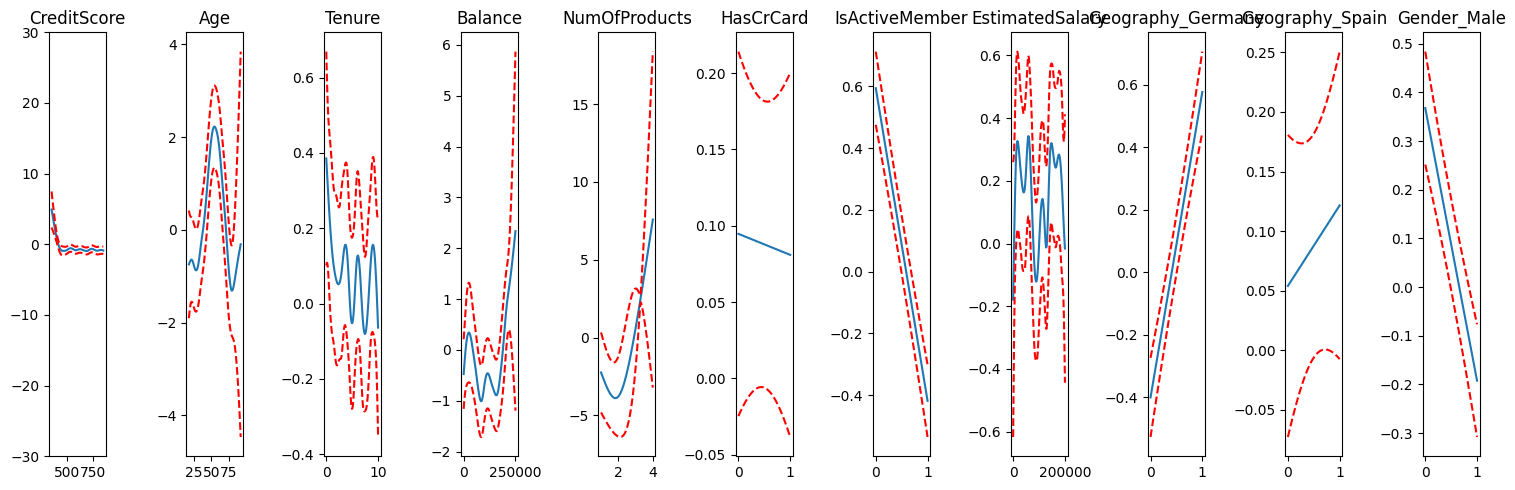

In [129]:
# Visualizar los efectos parciales (partial dependence plots) para las características más importantes
fig, axs = plt.subplots(1, X_train.shape[1], figsize=(15, 5))

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(X_train.columns[i])



plt.tight_layout()
plt.show()

In [130]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     63.6472
Link Function:                        LogitLink Log Likelihood:                                 -2748.5918
Number of Samples:                         8000 AIC:                                              5624.478
                                                AICc:                                            5625.5477
                                                UBRE:                                               2.7094
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3236
Feature Function                  Lam

/tmp/ipykernel_68990/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [132]:
# Precisión:
gam.accuracy(X, y)

0.862